---
### Data Set Information:
This dataset is taken from a research explained here. 

The goal of the research is to help the auditors by building a classification model that can predict the fraudulent firm on the basis the present and historical risk factors. The information about the sectors and the counts of firms are listed respectively as Irrigation (114), Public Health (77), Buildings and Roads (82), Forest (70), Corporate (47), Animal Husbandry (95), Communication (1), Electrical (4), Land (5), Science and Technology (3), Tourism (1), Fisheries (41), Industries (37), Agriculture (200).

There are two csv files to present data. Please merge these two datasets into one dataframe. All the steps should be done in Python. Please don't make any changes in csv files. Consider ``Audit_Risk`` as target columns for regression tasks, and ``Risk`` as the target column for classification tasks. 

### Attribute Information:
Many risk factors are examined from various areas like past records of audit office, audit-paras, environmental conditions reports, firm reputation summary, on-going issues report, profit-value records, loss-value records, follow-up reports etc. After in-depth interview with the auditors, important risk factors are evaluated and their probability of existence is calculated from the present and past records.


### Relevant Papers:
Hooda, Nishtha, Seema Bawa, and Prashant Singh Rana. 'Fraudulent Firm Classification: A Case Study of an External Audit.' Applied Artificial Intelligence 32.1 (2018): 48-64.

## Data Preparation

In [1]:
# Environment Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Loading datasets
audit_risk = pd.read_csv('audit_risk.csv')
trial = pd.read_csv('trial.csv')

In [5]:
# Exploring datasets
print(audit_risk.shape)
print(trial.shape)

(776, 27)
(776, 18)


In [7]:
audit_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
Sector_score      776 non-null float64
LOCATION_ID       776 non-null object
PARA_A            776 non-null float64
Score_A           776 non-null float64
Risk_A            776 non-null float64
PARA_B            776 non-null float64
Score_B           776 non-null float64
Risk_B            776 non-null float64
TOTAL             776 non-null float64
numbers           776 non-null float64
Score_B.1         776 non-null float64
Risk_C            776 non-null float64
Money_Value       775 non-null float64
Score_MV          776 non-null float64
Risk_D            776 non-null float64
District_Loss     776 non-null int64
PROB              776 non-null float64
RiSk_E            776 non-null float64
History           776 non-null int64
Prob              776 non-null float64
Risk_F            776 non-null float64
Score             776 non-null float64
Inherent_Risk     776 non-null float64
CON

In [4]:
audit_risk.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,...,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.0,776.000000,776.000000
mean,20.184536,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,13.218481,5.067655,0.223711,...,0.519072,0.104381,0.216753,0.053608,2.702577,17.680612,0.572680,0.5,7.168158,0.393041
std,24.319017,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,51.312829,0.264449,0.080352,...,0.290312,0.531031,0.067987,0.305835,0.858923,54.740244,0.444581,0.0,38.667494,0.488741
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.537500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.583500,0.400000,0.5,0.316700,0.000000
50%,3.890000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,1.370000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.555600,0.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,7.707500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,3.250000,10.663500,0.400000,0.5,3.249900,1.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,...,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000


In [5]:
trial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 18 columns):
Sector_score     776 non-null float64
LOCATION_ID      776 non-null object
PARA_A           776 non-null float64
SCORE_A          776 non-null int64
PARA_B           776 non-null float64
SCORE_B          776 non-null int64
TOTAL            776 non-null float64
numbers          776 non-null float64
Marks            776 non-null int64
Money_Value      775 non-null float64
MONEY_Marks      776 non-null int64
District         776 non-null int64
Loss             776 non-null int64
LOSS_SCORE       776 non-null int64
History          776 non-null int64
History_score    776 non-null int64
Score            776 non-null float64
Risk             776 non-null int64
dtypes: float64(7), int64(10), object(1)
memory usage: 109.2+ KB


In [6]:
trial.describe()

,Sector_score,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,775.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,20.184536,2.450194,3.512887,10.799988,3.131443,13.218481,5.067655,2.237113,14.137631,2.909794,2.505155,0.029639,2.061856,0.104381,2.167526,2.702577,0.626289
std,24.319017,5.678870,1.740549,50.083624,1.698042,51.312829,0.264449,0.803517,66.606519,1.597452,1.228678,0.184280,0.375080,0.531031,0.679869,0.858923,0.484100
min,1.850000,0.000000,2.000000,0.000000,2.000000,0.000000,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,2.370000,0.210000,2.000000,0.000000,2.000000,0.537500,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
50%,3.890000,0.875000,2.000000,0.405000,2.000000,1.370000,5.000000,2.000000,0.090000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.400000,1.000000
75%,55.570000,2.480000,6.000000,4.160000,4.000000,7.707500,5.000000,2.000000,5.595000,4.000000,2.000000,0.000000,2.000000,0.000000,2.000000,3.250000,1.000000
max,59.850000,85.000000,6.000000,1264.630000,6.000000,1268.910000,9.000000,6.000000,935.030000,6.000000,6.000000,2.000000,6.000000,9.000000,6.000000,5.200000,1.000000


In [8]:
# Remove categorical values in the column of LOCATION_ID
# Did not assign new values because they could be already one of the LOCATION_ID
audit_risk = audit_risk[audit_risk.LOCATION_ID != 'LOHARU']
audit_risk = audit_risk[audit_risk.LOCATION_ID != 'NUH']
audit_risk = audit_risk[audit_risk.LOCATION_ID != 'SAFIDON']

trial = trial[trial.LOCATION_ID != 'LOHARU']
trial = trial[trial.LOCATION_ID != 'NUH']
trial = trial[trial.LOCATION_ID != 'SAFIDON']

In [9]:
# Changing dtype(object to integer)
audit_risk['LOCATION_ID'] = pd.to_numeric(audit_risk['LOCATION_ID'])
trial['LOCATION_ID'] = pd.to_numeric(trial['LOCATION_ID'])

# Removed duplicated parameters with different scales in advance 
trial.drop(['Sector_score','LOCATION_ID','PARA_A','SCORE_A',
            'PARA_B','SCORE_B','TOTAL','numbers','District','Money_Value','History','Score','Risk'], axis=1, inplace = True)

In [10]:
# Dealing with missing values
print(audit_risk.isnull().sum().sort_values(ascending = False))
audit_risk['Money_Value'] = audit_risk.fillna(audit_risk['Money_Value'].mean()) #fill na with mean of the column

Money_Value       1
Risk              0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Score_MV          0
Audit_Risk        0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Sector_score      0
dtype: int64


In [11]:
trial.isnull().sum().sort_values(ascending = False)

History_score    0
LOSS_SCORE       0
Loss             0
MONEY_Marks      0
Marks            0
dtype: int64

In [12]:
# Checking the size
print(audit_risk.shape)
print(trial.shape)

(773, 27)
(773, 5)


In [13]:
# Merging datasets
df = pd.concat([audit_risk, trial], axis=1)
df.shape

(773, 32)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 773 entries, 0 to 775
Data columns (total 32 columns):
Sector_score      773 non-null float64
LOCATION_ID       773 non-null int64
PARA_A            773 non-null float64
Score_A           773 non-null float64
Risk_A            773 non-null float64
PARA_B            773 non-null float64
Score_B           773 non-null float64
Risk_B            773 non-null float64
TOTAL             773 non-null float64
numbers           773 non-null float64
Score_B.1         773 non-null float64
Risk_C            773 non-null float64
Money_Value       773 non-null float64
Score_MV          773 non-null float64
Risk_D            773 non-null float64
District_Loss     773 non-null int64
PROB              773 non-null float64
RiSk_E            773 non-null float64
History           773 non-null int64
Prob              773 non-null float64
Risk_F            773 non-null float64
Score             773 non-null float64
Inherent_Risk     773 non-null float64
CONT

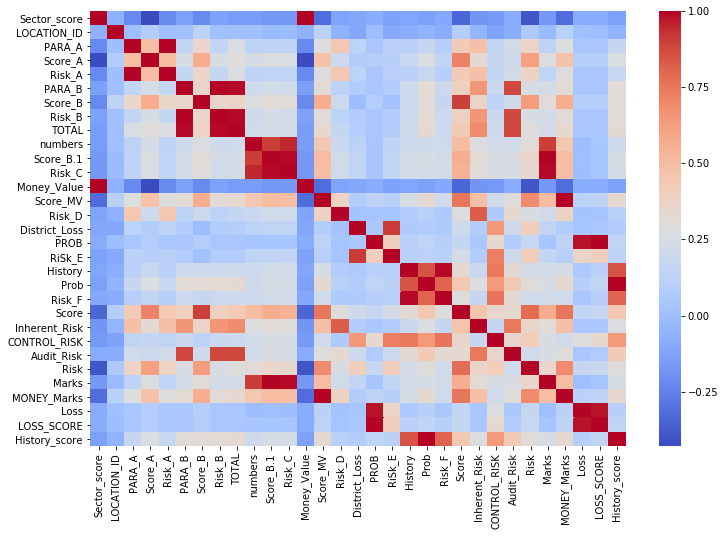

In [15]:
# Correlation within variables
plt.figure(figsize=(12,8))
sns.heatmap(df.drop(['Detection_Risk'], axis=1).corr(), cmap = 'coolwarm')

In [16]:
# Correlation with target variables
cor = pd.DataFrame(df.drop("Audit_Risk", axis=1).apply(lambda x: x.corr(df.Audit_Risk)).sort_values(ascending = False)).rename(columns = {0:'Correlation'})
cor.dropna()

,Correlation
TOTAL,0.888086
PARA_B,0.887780
Risk_B,0.887556
Inherent_Risk,0.750873
History_score,0.431217
Prob,0.431217
CONTROL_RISK,0.357872
Risk_D,0.334091
Score,0.332883
History,0.329682


### Data Modeling

#### Classification Models Setup

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,classification_report

In [27]:
clf_X = df.drop(['Audit_Risk','Risk'], axis=1)
clf_y = df['Risk']

In [28]:
# Splitting training and test data
X_train_org, X_test_org, y_train, y_test = train_test_split(clf_X, clf_y, test_size = 0.3, random_state = 101)

# Scaling data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [228]:
# GridSearch Plot
def grid_score_plot(df,col,train,test,title, xlabel,ylabel,annot=True):
    fig = plt.figure(figsize=(10,6))
    x=len(df[col])
    x_label=df[col].unique()
    ax = fig.add_subplot(111, facecolor='white')
    ax.plot(df[col], df[train], c ='b', linewidth=2, alpha=0.6, label='Train ROC Score',marker='o')
    ax.plot(df[col], df[test], c ='r', linewidth=2, alpha=0.6, label='Test ROC Score', marker='o')
    ax.legend()
    if(annot==True):
        for i,j in zip(df[col],round(df[train],3)):
            ax.annotate(str(j),xy=(i,j),color='gray')
        for i,j in zip(df[col],round(df[test],3)):
            ax.annotate(str(j),xy=(i,j),color='gray')
    ax.set_title(title, fontsize=20)
    ax.set_xlabel(xlabel, fontsize=10)
    ax.set_ylabel(ylabel, fontsize=10)
    plt.grid(zorder=0)
    plt.show()

#### Classification Model (1) - KNN Classification

In [49]:
knn = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(1,11,1)}

#cv =5
knn_grid_search = GridSearchCV(knn, parameters, scoring ='roc_auc', cv=5, n_jobs = -1, verbose = 3)
knn_grid_search.fit(X_train, y_train)
print('cv=5')
print("Best parameters: {}".format(knn_grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(knn_grid_search.best_score_))
print()


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  50 | elapsed:    0.1s remaining:    0.3s


cv=5
Best parameters: {'n_neighbors': 10}
Best cross-validation score: 0.9914



[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.4s finished


In [56]:
knn_result = pd.DataFrame(knn_grid_search.cv_results_)

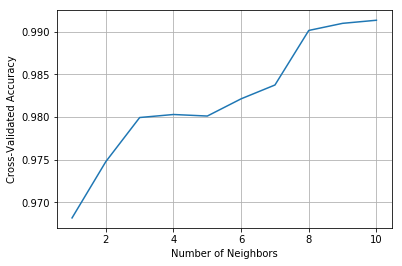

In [103]:
plt.plot(np.arange(1,11,1), knn_result['mean_test_score'] )
plt.xlabel('Number of Neighbors')
plt.ylabel('Cross-Validated Accuracy')
plt.grid()
plt.show()                          #Get the highest accuracy when k=10

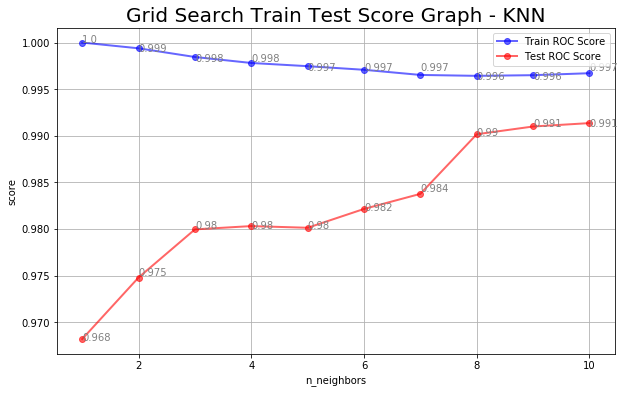

In [229]:
grid_score_plot(knn_result,'param_n_neighbors','mean_train_score','mean_test_score',
                'Grid Search Train Test Score Graph - KNN','n_neighbors','score')

In [137]:
knnclf_accuracy_train = grid.best_estimator_.score(X_train, y_train)
knnclf_accuracy_test = grid.best_estimator_.score(X_test, y_test)

print('KNN Classifier - Train Accuracy: %.4f'%knnclf_accuracy_train)
print('KNN Classifier - Test Accuracy: %.4f '%knnclf_accuracy_test)

KNN Classifier - Train Accuracy: 0.9501
KNN Classifier - Test Accuracy: 0.9397 


In [138]:
knnclf_auc_train = roc_auc_score(y_train, grid.predict(X_train))
knnclf_auc_test = roc_auc_score(y_test, grid.predict(X_test))

print('KNN Classifier - Train ROC AUC Score: %.4f'%knnclf_auc_train)
print('KNN Classifier - Test ROC AUC Score: %.4f '%knnclf_auc_test)

KNN Classifier - Train ROC AUC Score: 0.9380
KNN Classifier - Test ROC AUC Score: 0.9265 


In [49]:
pred = grid.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       139
           1       0.99      0.94      0.96        93

   micro avg       0.97      0.97      0.97       232
   macro avg       0.97      0.96      0.97       232
weighted avg       0.97      0.97      0.97       232



In [142]:
report_table =[['KNN Classification', str(knn_grid_search.best_params_).replace('{','', ).replace("'",'').replace('}',''),
                (knnclf_accuracy_train), (knnclf_accuracy_test), (knnclf_auc_train),(knnclf_auc_test)]]

#### Classification Model (2) - Logistic Regression

In [146]:
model = LogisticRegression(random_state=101)
parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2']}

#cv =5
log_grid_search = GridSearchCV(model, parameters, cv=5, scoring='roc_auc', n_jobs = -1,verbose=3)
log_grid_search.fit(X_train, y_train)
print('cv=5')
print("Best parameters: {}".format(log_grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(log_grid_search.best_score_))
print()


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  60 | elapsed:    0.1s remaining:    0.2s


cv=5
Best parameters: {'C': 10, 'penalty': 'l1'}
Best cross-validation score: 0.9981



[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   12.1s finished


In [147]:
log_result = pd.DataFrame(log_grid_search.cv_results_)

In [174]:
log_result['parameters'] = log_result.params.apply(lambda x: str(x).replace('{','').replace('}',''))
log_result['index'] = log_result.index

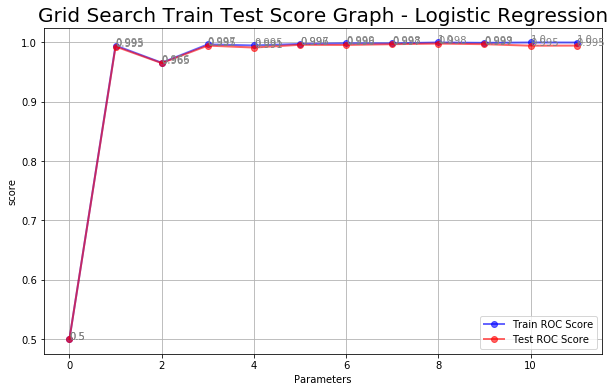

,0,1,2,3,4,5,6,7,8,9,10,11
index,0,1,2,3,4,5,6,7,8,9,10,11
parameters,"'C': 0.001, 'penalty': 'l1'","'C': 0.001, 'penalty': 'l2'","'C': 0.01, 'penalty': 'l1'","'C': 0.01, 'penalty': 'l2'","'C': 0.1, 'penalty': 'l1'","'C': 0.1, 'penalty': 'l2'","'C': 1, 'penalty': 'l1'","'C': 1, 'penalty': 'l2'","'C': 10, 'penalty': 'l1'","'C': 10, 'penalty': 'l2'","'C': 100, 'penalty': 'l1'","'C': 100, 'penalty': 'l2'"


In [175]:
grid_score_plot(log_result,'index','mean_train_score','mean_test_score',
               'Grid Search Train Test Score Graph - Logistic Regression','Parameters','score')
log_result[['index','parameters']].transpose()

In [176]:
logistic_accuracy_train = grid.best_estimator_.score(X_train, y_train)
logistic_accuracy_test = grid.best_estimator_.score(X_test, y_test)

print('Logistic Regression Classifier - Train Accuracy: %.4f'%logistic_accuracy_train)
print('Logistic Regression Classifier - Test Accuracy: %.4f '%logistic_accuracy_test)

Logistic Regression Classifier - Train Accuracy: 0.9945
Logistic Regression Classifier - Test Accuracy: 0.9957 


In [177]:
logistic_auc_train = roc_auc_score(y_train, grid.predict(X_train))
logistic_auc_test = roc_auc_score(y_test, grid.predict(X_test))

print('Logstic Regression - Train ROC AUC Score: %.4f'%logistic_auc_train)
print('Logistic Regression - Test ROC AUC Score: %.4f '%logistic_auc_test)

Logstic Regression - Train ROC AUC Score: 0.9938
Logistic Regression - Test ROC AUC Score: 0.9946 


In [178]:
pred = grid.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       139
           1       1.00      0.99      0.99        93

   micro avg       1.00      1.00      1.00       232
   macro avg       1.00      0.99      1.00       232
weighted avg       1.00      1.00      1.00       232



In [179]:
report_table = report_table + [['Logistic Regression', str(log_grid_search.best_params_).replace('{','', ).replace("'",'').replace('}',''), 
                                logistic_accuracy_train, logistic_accuracy_test, logistic_auc_train,logistic_auc_test]]

#### Classification Model (3) - Linear Support Vector Machine

In [240]:
model = LinearSVC()
parameters = [{'C':[0.001, 0.01, 0.1, 1, 10, 100], 'penalty':['l2'],'loss':['hinge','squared_hinge']},
              {'C':[0.001, 0.01, 0.1, 1, 10, 100], 'penalty':['l1'], 'dual':[False], 'loss':['squared_hinge']}]

#cv =5
lin_svc_grid = GridSearchCV(model, parameters, cv=5, n_jobs = -1, verbose=3)
lin_svc_grid.fit(X_train, y_train)
print('cv=5')
print("Best parameters: {}".format(lin_svc_grid.best_params_))
print("Best cross-validation score: {:.4f}".format(lin_svc_grid.best_score_))
print()


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    6.2s


cv=5
Best parameters: {'C': 100, 'loss': 'squared_hinge', 'penalty': 'l2'}
Best cross-validation score: 0.9834



[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    6.9s finished


In [241]:
lin_svc_result = pd.DataFrame(lin_svm_grid.cv_results_)

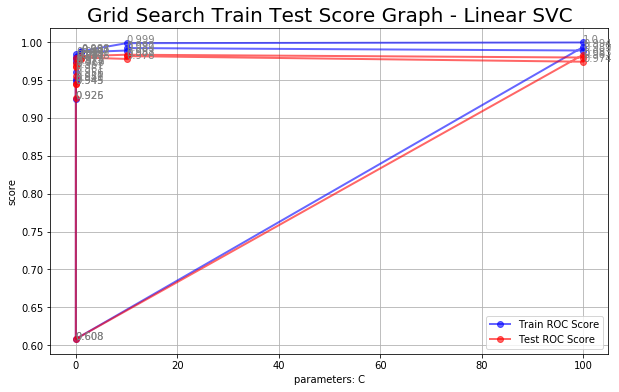

In [242]:
grid_score_plot(lin_svc_result,'param_C','mean_train_score','mean_test_score',
               'Grid Search Train Test Score Graph - Linear SVC','parameters: C' ,'score')

In [243]:
lsvc_accuracy_train = grid.best_estimator_.score(X_train, y_train)
lsvc_accuracy_test = grid.best_estimator_.score(X_test, y_test) 

print('Linear SVC - Train Accuracy: %.4f'%lsvc_accuracy_train)
print('Linear SVC - Test Accuracy: %.4f '%lsvc_accuracy_test)

Linear SVC - Train Accuracy: 0.9834
Linear SVC - Test Accuracy: 0.9828 


In [244]:
lsvc_auc_train = roc_auc_score(y_train, grid.predict(X_train))
lsvc_auc_test = roc_auc_score(y_test, grid.predict(X_test))

print('Linear SVC - Train ROC AUC Score: %.4f'%lsvc_auc_train)
print('Linear SVC - Test ROC AUC Score: %.4f '%lsvc_auc_test)

Linear SVC - Train ROC AUC Score: 0.9813
Linear SVC - Test ROC AUC Score: 0.9785 


In [245]:
pred = grid.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       139
           1       1.00      0.96      0.98        93

   micro avg       0.98      0.98      0.98       232
   macro avg       0.99      0.98      0.98       232
weighted avg       0.98      0.98      0.98       232



In [246]:
report_table = report_table + [['Linear SVC', str(lin_svc_grid.best_params_).replace('{','', ).replace("'",'').replace('}',''), 
                                lsvc_accuracy_train, lsvc_accuracy_test, lsvc_auc_train,lsvc_auc_test]]

#### Classification Model (4) - rbf Kernelized Support Vector Machine

In [198]:
model = SVC(kernel='rbf')
parameters = [{'C':[0.001, 0.01, 0.1, 1, 10, 100], 'gamma':[0.001,0.01,0.1,1,10,100]}]

#cv =5
rbf_svc_grid = GridSearchCV(model, parameters, scoring = 'roc_auc',cv=5, n_jobs = -1, verbose=3)
rbf_svc_grid.fit(X_train, y_train)
print('cv=5')
print("Best parameters: {}".format(rbf_svc_grid.best_params_))
print("Best cross-validation score: {:.4f}".format(rbf_svc_grid.best_score_))
print()


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s


cv=5
Best parameters: {'C': 100, 'gamma': 0.001}
Best cross-validation score: 0.9972



[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    1.6s finished


In [214]:
rbf_svc_result = pd.DataFrame(rbf_svc_grid.cv_results_)
rbf_svc_result['parameters'] = rbf_svc_result.params.apply(lambda x: str(x).replace('{','').replace('}',''))
rbf_svc_result['index'] = rbf_svc_result.index

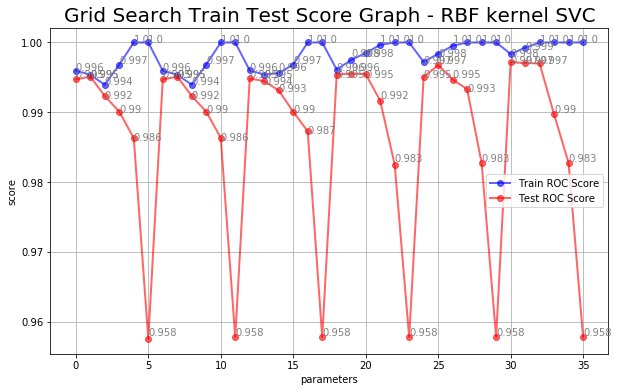

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
index,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
parameters,"'C': 0.001, 'gamma': 0.001","'C': 0.001, 'gamma': 0.01","'C': 0.001, 'gamma': 0.1","'C': 0.001, 'gamma': 1","'C': 0.001, 'gamma': 10","'C': 0.001, 'gamma': 100","'C': 0.01, 'gamma': 0.001","'C': 0.01, 'gamma': 0.01","'C': 0.01, 'gamma': 0.1","'C': 0.01, 'gamma': 1",...,"'C': 10, 'gamma': 0.1","'C': 10, 'gamma': 1","'C': 10, 'gamma': 10","'C': 10, 'gamma': 100","'C': 100, 'gamma': 0.001","'C': 100, 'gamma': 0.01","'C': 100, 'gamma': 0.1","'C': 100, 'gamma': 1","'C': 100, 'gamma': 10","'C': 100, 'gamma': 100"


In [215]:
grid_score_plot(rbf_svc_result,'index','mean_train_score','mean_test_score',
               'Grid Search Train Test Score Graph - RBF kernel SVC','parameters','score')
rbf_svc_result[['index','parameters']].transpose()

In [216]:
rbf_svc_accuracy_train = grid.best_estimator_.score(X_train, y_train)
rbf_svc_accuracy_test = grid.best_estimator_.score(X_test, y_test)

print('RBF SVC - Train Accuracy: %.4f'%rbf_svc_accuracy_train)
print('RBF SVC - Test Accuracy: %.4f '%rbf_svc_accuracy_test)

RBF SVC - Train Accuracy: 0.9834
RBF SVC - Test Accuracy: 0.9828 


In [217]:
rbf_svc_auc_train = roc_auc_score(y_train, grid.predict(X_train))
rbf_svc_auc_test = roc_auc_score(y_test, grid.predict(X_test))

print('RBF Kernel SVC - Train ROC AUC Score: %.4f'%rbf_svc_auc_train)
print('RBF Kernel SVC - Test ROC AUC Score: %.4f '%rbf_svc_auc_test)

RBF Kernel SVC - Train ROC AUC Score: 0.9813
RBF Kernel SVC - Test ROC AUC Score: 0.9785 


In [218]:
pred = grid.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       139
           1       1.00      0.96      0.98        93

   micro avg       0.98      0.98      0.98       232
   macro avg       0.99      0.98      0.98       232
weighted avg       0.98      0.98      0.98       232



In [219]:
report_table  = report_table +[['RBF Kernel SVC', str(rbf_svc_grid.best_params_).replace('{','', ).replace("'",'').replace('}',''), 
                                rbf_svc_accuracy_train, rbf_svc_accuracy_test,rbf_svc_auc_train,rbf_svc_auc_test]]

#### Classfication Model (5) - Decision Tree Classification

In [220]:
model = DecisionTreeClassifier()
parameters = [{'max_depth':[1,2,3,4,5,6,7,8,9,10], 'max_features':[1,2,3,4,5,6,7,8,9,10]}]

#cv =5
dtree_grid = GridSearchCV(model, parameters, scoring='roc_auc', cv=5, n_jobs = -1)
dtree_grid.fit(X_train, y_train)
print('cv=5')
print("Best parameters: {}".format(dtree_grid.best_params_))
print("Best cross-validation score: {:.4f}".format(dtree_grid.best_score_))
print()

cv=5
Best parameters: {'max_depth': 4, 'max_features': 10}
Best cross-validation score: 0.9957



C:\Users\josep\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [224]:
dtree_result = pd.DataFrame(dtree_grid.cv_results_)
dtree_result['parameters'] = dtree_result.params.apply(lambda x: str(x).replace('{','').replace('}',''))
dtree_result['index'] = dtree_result.index

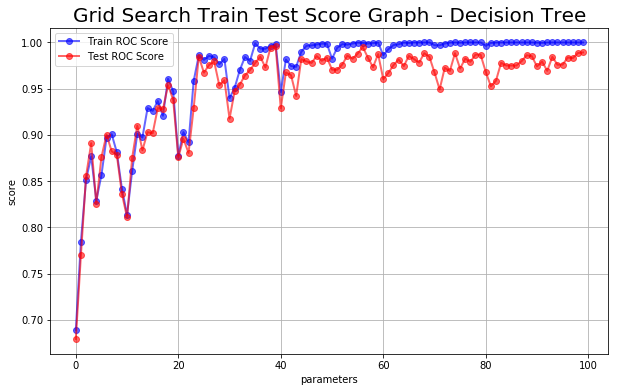

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
index,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
parameters,"'max_depth': 1, 'max_features': 1","'max_depth': 1, 'max_features': 2","'max_depth': 1, 'max_features': 3","'max_depth': 1, 'max_features': 4","'max_depth': 1, 'max_features': 5","'max_depth': 1, 'max_features': 6","'max_depth': 1, 'max_features': 7","'max_depth': 1, 'max_features': 8","'max_depth': 1, 'max_features': 9","'max_depth': 1, 'max_features': 10",...,"'max_depth': 10, 'max_features': 1","'max_depth': 10, 'max_features': 2","'max_depth': 10, 'max_features': 3","'max_depth': 10, 'max_features': 4","'max_depth': 10, 'max_features': 5","'max_depth': 10, 'max_features': 6","'max_depth': 10, 'max_features': 7","'max_depth': 10, 'max_features': 8","'max_depth': 10, 'max_features': 9","'max_depth': 10, 'max_features': 10"


In [230]:
grid_score_plot(dtree_result,'index','mean_train_score','mean_test_score',
               'Grid Search Train Test Score Graph - Decision Tree','parameters','score', False)
dtree_result[['index','parameters']].transpose()

In [231]:
dtree_accuracy_train = grid.best_estimator_.score(X_train, y_train)
dtree_accuracy_test = grid.best_estimator_.score(X_test, y_test)

print('Decision Tree Classofier - Train Accuracy: %.4f'%dtree_accuracy_train)
print('Decision Tree Classifier - Test Accuracy: %.4f '%dtree_accuracy_test)

Decision Tree Classofier - Train Accuracy: 0.9834
Decision Tree Classifier - Test Accuracy: 0.9828 


In [232]:
dtree_auc_train = roc_auc_score(y_train, grid.predict(X_train))
dtree_auc_test = roc_auc_score(y_test, grid.predict(X_test))

print('Decision Tree Classifier - Train ROC AUC Score: %.4f'%dtree_auc_train)
print('Decision Tree Classifier - Test ROC AUC Score: %.4f '%dtree_auc_test)

Decision Tree Classifier - Train ROC AUC Score: 0.9813
Decision Tree Classifier - Test ROC AUC Score: 0.9785 


In [233]:
pred = grid.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       139
           1       1.00      0.96      0.98        93

   micro avg       0.98      0.98      0.98       232
   macro avg       0.99      0.98      0.98       232
weighted avg       0.98      0.98      0.98       232



In [234]:
report_table  = report_table +[['Decision Tree', str(dtree_grid.best_params_).replace('{','', ).replace("'",'').replace('}',''), 
                                dtree_accuracy_train, dtree_accuracy_test,dtree_auc_train,dtree_auc_test]]

In [248]:
report = pd.DataFrame(report_table,columns = ['Model Name', 'Model Parameters', 
                                              'Train Accuracy', 'Test Accuracy', 
                                              'Train AUC Score', 'Test AUC Score'])

In [249]:
report.index = report['Model Name']
report.drop(['Model Name'],axis=1, inplace=True)

In [250]:
report

,Model Parameters,Train Accuracy,Test Accuracy,Train AUC Score,Test AUC Score
Model Name,,,,,
KNN Classification,n_neighbors: 10,0.950092,0.939655,0.937998,0.926510
Logistic Regression,"C: 10, penalty: l1",0.994455,0.995690,0.993763,0.994624
Linear SVC,"C: 100, loss: squared_hinge, penalty: l2",0.994455,0.995690,0.993763,0.994624
RBF Kernel SVC,"C: 100, gamma: 0.001",0.983364,0.982759,0.981290,0.978495
Decision Tree,"max_depth: 4, max_features: 10",0.983364,0.982759,0.981290,0.978495
Linear SVC,"C: 100, loss: squared_hinge, penalty: l2",0.983364,0.982759,0.981290,0.978495


### Conclusion

#### The Best Models

- Best Classification Model: Logistic Regression